In [31]:
import numpy as np
import pandas as pd
# Standard plotly imports
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
raw_data=pd.read_csv('ContinousDataset.csv')
raw_data

,Unnamed: 0,Scorecard,Team 1,Team 2,Margin,Ground,Match Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
0,0,ODI # 1,Australia,England,Winner2ndInning,Melbourne,"Jan 5, 1971",Australia,Australia,Home,Away,Second,First
1,1,ODI # 2,England,Australia,Winner2ndInning,Manchester,"Aug 24, 1972",England,England,Home,Away,Second,First
2,2,ODI # 3,England,Australia,Winner2ndInning,Lord's,"Aug 26, 1972",Australia,England,Home,Away,First,Second
3,3,ODI # 4,England,Australia,Winner2ndInning,Birmingham,"Aug 28, 1972",England,England,Home,Away,Second,First
4,4,ODI # 5,New Zealand,Pakistan,Winner1stInning,Christchurch,"Feb 11, 1973",New Zealand,New Zealand,Home,Away,First,Second
5,5,ODI # 6,England,New Zealand,Winner2ndInning,Swansea,"Jul 18, 1973",England,England,Home,Away,Second,First
6,6,ODI # 8,England,West Indies,Winner2ndInning,Leeds,"Sep 5, 1973",England,England,Home,Away,Second,First
7,7,ODI # 9,England,West Indies,Winner2ndInning,The Oval,"Sep 7, 1973",West Indies,England,Home,Away,First,Second
8,8,ODI # 10,New Zealand,Australia,Winner2ndInning,Dunedin,"Mar 30, 1974",Australia,New Zealand,Home,Away,First,Second
9,9,ODI # 11,New Zealand,Australia,Winner1stInning,Christchurch,"Mar 31, 1974",Australia,New Zealand,Home,Away,Second,First


In [34]:
raw_data.drop(columns=['Unnamed: 0','Venue_Team1','Venue_Team2','Innings_Team2'],inplace=True)  #The host country variable takes care of home and away
raw_data['BattingFirst']=raw_data['Innings_Team1']

In [35]:
raw_data.drop(columns=['Innings_Team1'],inplace=True)

In [36]:
for i in range(raw_data.shape[0]):
    if raw_data['BattingFirst'][i] == 'Second':
        raw_data['BattingFirst'][i] = raw_data['Team 1'][i]
    else:
            raw_data['BattingFirst'][i] = raw_data['Team 2'][i]
    

In [37]:
raw_data.drop(columns=['Margin','Scorecard'],inplace=True)  # Becuase margin is already explained by batting first variable

In [38]:
raw_data.info() # to check for total count and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7494 entries, 0 to 7493
Data columns (total 7 columns):
Team 1          7494 non-null object
Team 2          7494 non-null object
Ground          7494 non-null object
Match Date      7494 non-null object
Winner          7494 non-null object
Host_Country    7364 non-null object
BattingFirst    7494 non-null object
dtypes: object(7)
memory usage: 409.9+ KB


In [39]:
raw_data.dropna(inplace=True) # drop rows where at least one element is missing
raw_data.reset_index(inplace=True)

### Now Let's Visualize the data

Before doing that here are the questions that i want to answer or here is my alternate hypothesis:

1) How good does Asian teams perform in England, SouthAfrica,Australia and New Zealand?

2) Is india which is currently at the top performs significantly better than other teams at home ground or away?

3) The usuall question of batting first affect on winning? In Asia and Outside Asia?


### Let's see who has most wins overall from 1971-2017
(Beforing answering above mentioned 4 questions :D )

In [40]:
Winner_series=pd.DataFrame(raw_data['Winner'].value_counts())
Winner_series.iplot(kind='bar',title='Highest Wins from 1971-2017')

### 1) How good does Asian teams perform in England, SouthAfrica,Australia and New Zealand?

In [41]:
Asian_teams=['India','Pakistan','Sri Lanka','Bangladesh']
Top_western_sides=['England','South Africa','New Zealand','Australia']
other_teams=list(set(raw_data['Winner'].unique())-set(Top_western_sides)-set(Asian_teams))

Asian_count=0
western_count=0

for i in range (raw_data.shape[0]):
     for teams in Top_western_sides:
             if raw_data['Host_Country'][i] == teams:
                for asianteams in Asian_teams:
                    if raw_data['Winner'][i] == asianteams:
                        Asian_count = Asian_count + 1
                        
                for teams in Top_western_sides:
                    if raw_data['Winner'][i] == teams:
                        western_count = western_count + 1
                    

df=pd.DataFrame(data=['PK,IND,SL,BD','AUS,ENG,NZ,SA'],columns=['labels']) 
df['Scores']=[Asian_count,western_count]
df.iplot(kind='pie',values='Scores',labels='labels',pull=0.05,colorscale='blues',textinfo='value+percent',title='Matches Played in western countries by Asian Teams')
        

### 2) Is india which is currently at the top performs significantly better than other teams at home ground or away?

In [42]:
India_home_win_count=0
India_home_loose_count=0
India_away_win_count=0
India_away_loose_count=0
for i in range (raw_data.shape[0]):
    if raw_data['Host_Country'][i] == 'India':
        if raw_data['Winner'][i] == 'India':
            India_home_win_count = India_home_win_count + 1
        else:
            India_home_loose_count= India_home_loose_count + 1
    if raw_data['Team 2'][i] == 'India':       #the data set is arranged in such way that home country is always Team1
        if raw_data['Winner'][i] == 'India':
            India_away_win_count = India_away_win_count + 1
        else:
            India_away_loose_count = India_away_loose_count + 1

In [43]:
India_away_win_percentage=np.true_divide(India_away_win_count,India_away_win_count+India_away_loose_count) * 100
India_home_win_percentage=np.true_divide(India_home_win_count,India_home_loose_count+India_home_win_count) * 100

In [44]:
India_info=pd.DataFrame(data=[(India_home_win_count,India_home_loose_count),(India_away_win_count,India_away_loose_count)],columns=['home_info','away_info'],index=['wins','losses'])

In [45]:
India_info.iplot(kind='bar',title='India''s Record from 1971-2017',yTitle='Number of Matches',fill=True,boxpoints=True)

### 3) The usuall question of batting first affect on winning? In Asia and Outside Asia?
We shall consider these groups for in asia and out of asia

Asian_teams=[PAK,IND,SL,BD]

Outside_Asia=[AUS,ENG,SA,NZ]

In [46]:
batting_first_wins_in_Asia=0
batting_first_losses_in_Asia=0
batting_first_wins_outside_asia=0
batting_first_losses_outside_Asia=0

for i in range(raw_data.shape[0]):
    for teams in Asian_teams:
        if raw_data['Host_Country'][i] == teams:
            if raw_data['BattingFirst'][i] and raw_data['Winner'][i] == teams:
                 batting_first_wins_in_Asia = batting_first_wins_in_Asia + 1
            elif raw_data['BattingFirst'][i] and raw_data['Winner'][i] != teams:
                 batting_first_losses_in_Asia= batting_first_losses_in_Asia + 1
            else:
                break
                    
    for teams in Top_western_sides:
        if raw_data['Host_Country'][i] == teams:
            if raw_data['BattingFirst'][i] and raw_data['Winner'][i] == teams:
                batting_first_wins_outside_asia= batting_first_wins_outside_asia + 1
        
            elif raw_data['BattingFirst'][i] and raw_data['Winner'][i] != teams:
                batting_first_losses_outside_Asia = batting_first_losses_outside_Asia + 1


In [47]:
df2= pd.DataFrame(data=[batting_first_wins_in_Asia,batting_first_losses_in_Asia],columns=['In_Asia'])
df2['Outside_Asia']=[batting_first_wins_outside_asia,batting_first_losses_outside_Asia]
df2['labels']=['BattingFirst Wins Inside Asia','BattingFirst Losses Inside Asia']
df2.iplot(kind='pie',values='In_Asia',labels='labels',title='Batting First Affect on Winning Inside Asia from 1971-2017',pull=0.05)

In [48]:
raw_data.set_index('index',inplace=True)
raw_data.head()

,Team 1,Team 2,Ground,Match Date,Winner,Host_Country,BattingFirst
index,,,,,,,
0,Australia,England,Melbourne,"Jan 5, 1971",Australia,Australia,Australia
1,England,Australia,Manchester,"Aug 24, 1972",England,England,England
2,England,Australia,Lord's,"Aug 26, 1972",Australia,England,Australia
3,England,Australia,Birmingham,"Aug 28, 1972",England,England,England
4,New Zealand,Pakistan,Christchurch,"Feb 11, 1973",New Zealand,New Zealand,Pakistan


In [62]:
Total_wins=[]
Total_played=[]
Win_percentage=[]
Played_at_home=[]
Wins_at_home=[]
Wins_Batting_first=[]
Wins_ratio_abroad_to_home=[]

def New_columns(team):
    Total_wins.append(np.array(raw_data[raw_data['Winner'] == team].count())[0])
    Total_played.append(np.array(raw_data[(raw_data['Team 1']== team) | (raw_data['Team 2'] == team)].count())[0])
    Played_at_home.append(np.array(raw_data[raw_data['Host_Country'] == team].count())[0])
    Wins_at_home.append(np.array(raw_data[(raw_data['Winner'] == team) & (raw_data['Host_Country'] == team) ].count())[0])
    Wins_Batting_first.append(np.array(raw_data[(raw_data['BattingFirst'] == team) & (raw_data['Winner'] == team)].count())[0])

In [63]:
New_columns('Australia')
New_columns('South Africa')
New_columns('India')
New_columns('England')
New_columns('Pakistan')
New_columns('New Zealand')
New_columns('West Indies')
New_columns('Bangladesh')
New_columns('Sri Lanka')
New_columns('Afghanistan')

In [67]:
Win_percentage=np.true_divide(Total_wins,Total_played)
Abroad_Wins=[]
Abroad_Wins=np.subtract(Total_wins,Wins_at_home)
Wins_ratio_abroad_to_home=np.true_divide(Abroad_Wins,Wins_at_home)

C:\Users\ACER M5\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning:

divide by zero encountered in true_divide



In [76]:
new_data=pd.DataFrame(data={'Total_played':Total_played,'Total_wins':Total_wins,'Played_at_home':Played_at_home,'Wins_at_home':Wins_at_home,'Wins_Batting_first':Wins_Batting_first,'Abroad_Wins':Abroad_Wins,'Win_percentage':Win_percentage,'Wins_ratio_abroad_to_home':Wins_ratio_abroad_to_home})

In [78]:
new_data['Teams']=['Australia','South Africa','India','England','Pakistan','New Zealand','West Indies','Bangladesh','Sri Lanka','Afghanistan']

In [81]:
new_data.set_index('Teams',inplace=True)


,Total_played,Total_wins,Played_at_home,Wins_at_home,Wins_Batting_first,Abroad_Wins,Win_percentage,Wins_ratio_abroad_to_home
Teams,,,,,,,,
Australia,1700,1088,1170,548,478,540,0.640000,0.985401
South Africa,1090,704,628,336,342,368,0.645872,1.095238
India,1710,922,792,358,516,564,0.539181,1.575419
England,1320,684,774,320,382,364,0.518182,1.137500
Pakistan,1664,914,390,202,420,712,0.549279,3.524752
New Zealand,1354,642,602,324,324,318,0.474151,0.981481
West Indies,1450,752,570,258,424,494,0.518621,1.914729
Bangladesh,650,208,398,128,112,80,0.320000,0.625000
Sri Lanka,1474,710,522,274,352,436,0.481682,1.591241


In [85]:
new_data.iloc[9,7] = 0

In [86]:
new_data

,Total_played,Total_wins,Played_at_home,Wins_at_home,Wins_Batting_first,Abroad_Wins,Win_percentage,Wins_ratio_abroad_to_home
Teams,,,,,,,,
Australia,1700,1088,1170,548,478,540,0.640000,0.985401
South Africa,1090,704,628,336,342,368,0.645872,1.095238
India,1710,922,792,358,516,564,0.539181,1.575419
England,1320,684,774,320,382,364,0.518182,1.137500
Pakistan,1664,914,390,202,420,712,0.549279,3.524752
New Zealand,1354,642,602,324,324,318,0.474151,0.981481
West Indies,1450,752,570,258,424,494,0.518621,1.914729
Bangladesh,650,208,398,128,112,80,0.320000,0.625000
Sri Lanka,1474,710,522,274,352,436,0.481682,1.591241


#### PCA

An important thing to realize here is that, the principal components are less interpretable and don’t have any real meaning since they are constructed as linear combinations of the initial variables.

Geometrically speaking, principal components represent the directions of the data that explain a maximal amount of variance, that is to say, the lines that capture most information of the data. The relationship between variance and information here, is that, the larger the variance carried by a line, the larger the dispersion of the data points along it, and the larger the dispersion along a line, the more the information it has. To put all this simply, just think of principal components as new axes that provide the best angle to see and evaluate the data, so that the differences between the observations are better visible.

In [133]:
y=np.array(new_data.index)

In [118]:
from sklearn.preprocessing import StandardScaler
Encoder=StandardScaler()
raw_values=Encoder.fit_transform(new_data.iloc[:,0:9].values)

In [121]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=3)
Y_sklearn = sklearn_pca.fit(raw_values)

In [122]:
Y_sklearn.explained_variance_ratio_

array([0.7316652 , 0.16789716, 0.08631255])

In [124]:
Y_sklearn.components_

array([[-0.39628914, -0.4126371 , -0.33261823, -0.35280957, -0.40494855,
        -0.37902843, -0.25667521, -0.25307712],
       [ 0.1190328 ,  0.00877974, -0.45661622, -0.42674148,  0.02932834,
         0.32330909, -0.20350107,  0.66958632],
       [ 0.27013632, -0.01345551,  0.28032301,  0.13998487,  0.07199504,
        -0.12233404, -0.89904859,  0.01520835]])

#### This explains that we have at the end three Eigen Vectors and they explain the  (73+16+8) % of the data variance 

In [126]:
Y_result=sklearn_pca.transform(raw_values)

In [141]:
Y_result

array([[-3.24996715, -1.91647024, -0.19474938],
       [-0.36438511, -0.82566115, -1.27870772],
       [-2.13373188, -0.00951893,  0.32191147],
       [-0.39383525, -0.61587203,  0.32641222],
       [-1.83364479,  2.76810493, -0.46410789],
       [ 0.25428914, -0.45427452,  0.64007711],
       [-0.80587593,  0.74406415,  0.08426168],
       [ 3.81373159, -0.07250191,  1.50432484],
       [-0.23183947,  0.50502279,  0.44826645],
       [ 4.94525885, -0.1228931 , -1.38768878]])

#### So here we have corresponding values along each principal components for the 10 rows or teams.

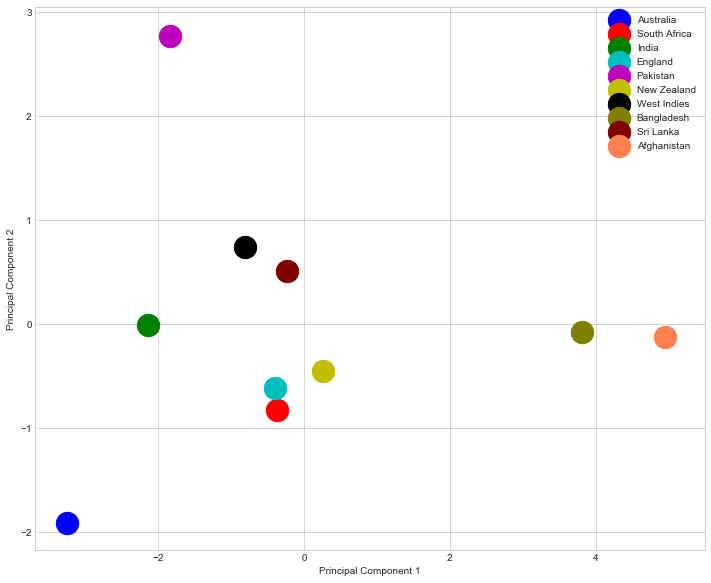

In [161]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12,10))
    for lab, col in zip(('Australia','South Africa','India','England','Pakistan','New Zealand','West Indies','Bangladesh','Sri Lanka','Afghanistan'), 
                        ('b', 'r', 'g','c','m','y','k','olive','maroon','coral')):
        plt.scatter(Y_result[y==lab, 0],
                    Y_result[y==lab, 1],
                    s=np.abs(Y_result[y==lab,2]) + 500,
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='best')
    plt.show()